In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!git clone https://github.com/ultralytics/yolov5  # клонируем репозиторий
%cd yolov5
%pip install -qr requirements.txt  # устанавливаем зависимости


Cloning into 'yolov5'...
remote: Enumerating objects: 16680, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 16680 (delta 101), reused 129 (delta 63), pack-reused 16459
Receiving objects: 100% (16680/16680), 15.39 MiB | 6.58 MiB/s, done.
Resolving deltas: 100% (11404/11404), done.
/content/yolov5/yolov5


In [6]:
# Укажите путь к вашему датасету в Google Drive
dataset_path = '/content/drive/My Drive/content/drive/MyDrive/axial_t1wce_2_class'


In [7]:
# Проверка структуры данных
!ls /content/drive/MyDrive/axial_t1wce_2_class
!ls /content/drive/MyDrive/axial_t1wce_2_class/images/train
!ls /content/drive/MyDrive/axial_t1wce_2_class/images/test
!ls /content/drive/MyDrive/axial_t1wce_2_class/labels/train
!ls /content/drive/MyDrive/axial_t1wce_2_class/labels/test

axial_t1wce_2_class.yaml  data.yaml  images  labels
00095_170.jpg  00123_13.jpg   00169_112.jpg  00263_137.jpg  00304_113.jpg  00334_101.jpg
00095_176.jpg  00123_14.jpg   00169_119.jpg  00270_11.jpg   00304_119.jpg  00334_108.jpg
00095_188.jpg  00123_15.jpg   00169_127.jpg  00270_12.jpg   00304_98.jpg   00334_114.jpg
00095_200.jpg  00123_16.jpg   00169_134.jpg  00270_13.jpg   00305_105.jpg  00334_120.jpg
00095_212.jpg  00124_10.jpg   00169_141.jpg  00271_106.jpg  00305_107.jpg  00334_121.jpg
00095_224.jpg  00124_11.jpg   00169_142.jpg  00271_111.jpg  00305_113.jpg  00334_91.jpg
00095_226.jpg  00124_12.jpg   00169_149.jpg  00271_116.jpg  00305_116.jpg  00334_95.jpg
00095_236.jpg  00124_6.jpg    00172_102.jpg  00271_117.jpg  00305_97.jpg   00338_15.jpg
00097_65.jpg   00124_7.jpg    00172_108.jpg  00271_122.jpg  00305_98.jpg   00340_119.jpg
00097_68.jpg   00124_8.jpg    00172_114.jpg  00271_124.jpg  00306_102.jpg  00340_121.jpg
00097_70.jpg   00124_9.jpg    00172_92.jpg   00271_128.jpg  0

In [16]:
# Путь к данным в Google Drive
data_path = '/content/drive/MyDrive/image'

# Создание конфигурационного файла данных
data_config = f"""
train: /content/drive/MyDrive/axial_t1wce_2_class/images/train
val: /content/drive/MyDrive/axial_t1wce_2_class/images/test

nc: 2  # количество классов
names: ['tumor', 'background']  # имена классов
"""

with open('/content/drive/MyDrive/axial_t1wce_2_class/axial_t1wce_2_class.yaml', 'w') as f:
    f.write(data_config)


In [ ]:
# Обучение модели YOLOv5
!python train.py --img 640 --batch 16 --epochs 50 --data /content/drive/MyDrive/axial_t1wce_2_class/axial_t1wce_2_class.yaml --weights yolov5s.pt --cache


2024-06-28 06:14:57.754311: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 06:14:57.754372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 06:14:57.756070: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/axial_t1wce_2_class/axial_t1wce_2_class.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=F

In [15]:
# Оценка производительности модели
!python val.py --data /content/drive/MyDrive/axial_t1wce_2_class/axial_t1wce_2_class.yaml --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640


val: data=/content/drive/MyDrive/axial_t1wce_2_class/data.yaml, weights=['/content/yolov5/runs/train/brain_tumor_detection/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/axial_t1wce_2_class/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.08s/it]
                   all         75         81    0.00751      0.951      0.341      0.102
                 tumor         75  

In [19]:
# Копирование файлов best.pt и last.pt в Google Drive
import os
import shutil

# Укажите путь к директории с результатами
result_dir = '/content/yolov5/runs/train/brain_tumor_detection/weights'

# Путь для сохранения в Google Drive
drive_result_dir = '/content/drive/MyDrive/yolov5_models/brain_tumor_detection/'

# Создание директории в Google Drive, если она не существует
os.makedirs(drive_result_dir, exist_ok=True)

# Копирование файлов best.pt и last.pt в Google Drive
shutil.copy(f'{result_dir}/best.pt', drive_result_dir)
shutil.copy(f'{result_dir}/last.pt', drive_result_dir)

print(f"Model weights saved to {drive_result_dir}")


Model weights saved to /content/drive/MyDrive/yolov5_models/brain_tumor_detection/


In [1]:
import torch

# Загрузка модели YOLOv5 (например, v5s)
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


/usr/local/lib/python3.10/dist-packages/torch/hub.py:293: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 157.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 153.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 11.0s, installed 3 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0', 'requests>=2.32.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-6-27 Python-3.10.12 torch-2.3.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 38.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
!pip install torch torchvision
!pip install git+https://github.com/ultralytics/yolov5.git
!pip install pillow


  Cloning https://github.com/ultralytics/yolov5.git to /tmp/pip-req-build-mn8jdasf
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/yolov5.git /tmp/pip-req-build-mn8jdasf
  Resolved https://github.com/ultralytics/yolov5.git to commit ab364c984b9fdace147fcde339ae4afccc31b642
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [7]:
import torch
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка предобученной модели YOLOv5
# Замените 'your_custom_model_path' на путь к вашей модели, если вы загрузили ее на Google Drive или напрямую в Colab
model = torch.hub.load('ultralytics/yolov5', 'custom', path='your_custom_model_path')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-27 Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [10]:
# Загрузка изображения
uploaded = files.upload()

# Получение пути к загруженному изображению
img_path = list(uploaded.keys())[0]

# Проверка формата изображения с помощью OpenCV
try:
    img = cv2.imread(img_path)
    if img is None:
        raise ValueError("Файл не является изображением или поврежден")
    # Преобразование изображения из BGR в RGB формат
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Скрыть оси
    plt.show()
except Exception as e:
    print(f"Ошибка: {e}")


Saving 00097_70.jpg to 00097_70.jpg


Объекты найдены:
        xmin       ymin        xmax        ymax  confidence  class    name
0  67.542923  49.127209  202.033356  227.881546    0.324242      0  person


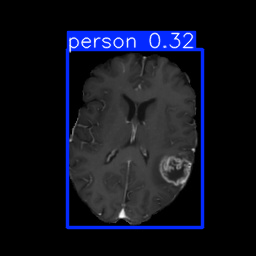

In [11]:
# Если изображение успешно загружено и преобразовано
if 'img' in locals():
    # Выполнение детекции объектов
    results = model(img)

    # Получение таблицы с результатами
    df = results.pandas().xyxy[0]  # или results.xyxy[0] для получения тензора

    # Проверка, есть ли детекции
    if not df.empty:
        print("Объекты найдены:")
        print(df)
    else:
        print("Объекты не найдены")

    # Визуализация детекций
    results.show()
